# <center>Unsupervised Learing: Text Clustering</center>

References:
* http://brandonrose.org/clustering
* https://www.csee.umbc.edu/~nicholas/clustering/tutorial.pdf
* http://scikit-learn.org/stable/auto_examples/text/document_clustering.html
* https://www-users.cs.umn.edu/~kumar/dmbook/ch8.pdf
* http://infolab.stanford.edu/~ullman/mmds/ch7.pdf

## 1. Clustering vs. Classification
* Clustering (Unsupervised): divide a set of objects into clusters (parts of the set) so that objects in the same cluster are similar to each other, and/or objects in different clusters are dissimilar.
  * Representation of the objects
  * Similarity/distance measure
* Classifification (Supervised): group objects into predetermined categories
  * Representation of the objects
  * A training set

## 2. Why clustering
* Understand conceptually meaningful groups of objects that share common characteristics 
* Provides an abstraction from individual data objects to the clusters in which those data objects reside
* Uses of clustering
  * Summarization
  * Compression
  * Efficiently finding nearest neighbors

## 3. Types of Clusterings 
* Different kinds of models (https://www.geeksforgeeks.org/different-types-clustering-algorithm/):
  - Centroid models (partition): 
     - Similarity is derived as the closeness of a data point to the centroid of clusters. 
     - Flat partition, e.g. K-Means
     <img src='centroid.png' width="40%">
  - Connectivity models (Hierarchical algorithms): 
     - Data points closer in data space exhibit more similarity to each other than the data points lying farther away.      
     - Hierarchy of clusters, e.g. agglomerative clustering
     <img src='connectivity.png' width="40%">
  - Distribution models: 
     - How probable is it that all data points in the cluster belong to the same distribution, concept, or topic
     - e.g. Latent Semantics Analysis, Latent Dirichlet Allocation (LDA)
     <img src='distribution.png' width="40%">
  - Density models: clusters correspond to areas of varied density of data points in the data space
     - e.g. DBSCAN
     <img src='density.png' width="40%">
* Exclusive vs. Overlapping
  - Exclusive: each object is assigned to a single cluster, e.g. K-Means
  - Overlapping (non-exclusive): an object can simultaneously belong to more than one cluster, e.g. LDA

## 4. Evaluation of Clustering: What is a good clustering
### 4.1 External Evaluation: 
* External evaluation measures the degree to which predicted clustering labels correspond to actual class labels  
* **Precision** and **Recall**

### 4.2. Internal Evaluation 
<img src='cohension_separation.png' width="60%">
* **Cohension (Intra-cluster similarity)**: how "cohesive" a cluster is, i.e. the average similarity of objects in the same cluster. 
   - e.g. cluster radius: $\max{d(x, μ_A)}$ where $μ_A$ is the arithmetic mean of cluster A and $x$ is a point in A
   - e.g. cluster diameter: $\max{d(x, y)}$ where $x,y$ are two points in cluster A

* **Separation (Inter-cluster dissimilarity)**: how "separate" a cluster from another, i.e. the average similarity of all samples in cluster $A$ to all the samples in cluster $B$.
   - e.g. Separation can be calculated as average distance: $\frac{1}{|A|*|B|}\sum_{x \in A}{\sum_{y \in B}{d(x, y)}}$ 
* Metrics with combined cohension and separation (http://scikit-learn.org/stable/modules/clustering.html#clustering-evaluation)
   - Silhouette Coefficient: $s=\frac{b-a}{\max(a,b)}$, where $a$: the mean distance between a sample and all other points in the same cluster, and $b$: the mean distance between a sample and all other points in the next nearest cluster. $s \in [-1, 1]$.
   - Calinski-Harabaz Index: $s=\frac{b}{a}$ where $a$ is mean within\-cluster separation, and $b$ is the mean between\-cluster separation

## 5. K-Means
### 5.1. Algorithm outline: Cluster objects into K clusters
<img style="float: left;" src='Kmean1.png'  width='20%'/><img  src='Kmean2.png' width='20%'/>
- Algorithm: 
    1. Select K points as initial centroids 
    2. Repeat until centroids do not change:
        1. Form K clusters by assigning each point to its closest centroid by distance.
        2. Recompute the centroid of each cluster as the arithmetic mean of samples within the cluster. 
- A few observations of K-means:
  - Initial centroids have an impact on clustering. Usually, several rounds of clustering with random initial centroids are performed, and the most commonly occurring output centroids are chosen.
  - Centroids and distance measure are crtical in the algorithm
     - **Euclidean distance**: 
       - the best centroid for minimizing the average distance from all samples to the centroid is the mean of points in the cluster (https://www-users.cs.umn.edu/~kumar001/dmbook/ch8.pdf)
     - **Cosine similarity**: 
       * Well-accepted similarity measure for documents
       * It is not guaranteed that the mean of samples in a cluster is the best centroid 
       * For text clustering, the centroid does not stand for an actual document. How to interpret clusters?
       * A modified version of Kmeans is called K-medoids, where a representative sample is choosen as the center of a cluster, called as a medoid.   
- Python packages for Kmean
  * NLTK: can choose Euclidean or Cosine similarity as distance measure
  * Sklearn: only Euclidean distance is supported  

In [76]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [97]:
# Exercise 5.1.1 Load data and generate TF-IDF
# Load datasets (http://qwone.com/~jason/20Newsgroups/)
# For convenience, a subset of the data has been saved into "twenty_news_data.pkl"

import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics

data=pickle.load(open("twenty_news_data.pkl","rb"))

#Load just three categories: comp.graphics and soc.religion.christian
data=[item for item in data if item[1] in \
      ['comp.graphics','soc.religion.christian', 'sci.med']]

# Separate list of tuples to two lists
text,target=zip(*data)
text=list(text)
target=list(target)

# initialize the TfidfVectorizer 
# set min document frequency to 5

tfidf_vect = TfidfVectorizer(stop_words="english",\
                             min_df=5) 

# generate tfidf matrix
dtm= tfidf_vect.fit_transform(text)
print (dtm.shape)

(1777, 7006)


In [98]:
print(data[0][1])
print(len(data))

comp.graphics
1777


In [99]:
# Exercise 5.1.2 Clustering using NLTK KMean

from nltk.cluster import KMeansClusterer, cosine_distance

# set number of clusters
num_clusters=3

# initialize clustering model
# using cosine distance (can use another E distance)
# clustering will repeat 10 times
# each with different initial centroids
clusterer = KMeansClusterer(num_clusters, \
                            cosine_distance, repeats=10)

# samples are assigned to cluster labels starting from 0
clusters = clusterer.cluster(dtm.toarray(), \
                             assign_clusters=True)

#print the cluster labels of the first 5 samples
print(clusters[0:5])

[0, 0, 2, 2, 2]


In [80]:
# Exercise 5.1.3 Interpret each cluster by centroid

# a centroid is the arithemtic mean 
# of all samples in the cluster
# it may not stand for a real document

# find top words at centroid of each cluster
from sklearn import metrics
import numpy as np

# clusterer.means() contains the centroids to find a 代表性 document
# each row is a cluster, and 
# each column is a feature (word)
# three rows with 7000 columns
centroids=np.array(clusterer.means())

# argsort sort the matrix in ascending order 
# and return locations of features before sorting
# [:,::-1] reverse the order
sorted_centroids = centroids.argsort()[:, ::-1] 

# The mapping between feature (word)
# index and feature (word) can be obtained by
# the vectorizer's function get_feature_names()
voc_lookup= tfidf_vect.get_feature_names()

# important words in a cluster
for i in range(num_clusters):
    
    # get words with top 20 tf-idf weight in the centroid
    top_words=[voc_lookup[word_index] \
               for word_index in sorted_centroids[i, :20]]
    print("Cluster %d: %s " % (i, "; ".join(top_words)))

Cluster 0: edu; graphics; lines; subject; com; posting; university; organization; host; nntp; thanks; files; image; uk; ca; file; 3d; program; help; know 
Cluster 1: edu; pitt; com; gordon; banks; geb; msg; cs; article; science; writes; food; dyer; organization; doctor; subject; pittsburgh; don; lines; disease 
Cluster 2: god; edu; jesus; people; church; christians; christian; bible; christ; believe; hell; faith; think; rutgers; say; know; truth; don; subject; does 


In [81]:
print(centroids)
print(centroids.argsort()[:, ::-1] )

print('the largest value in the first row', centroids[0,2182])
print('the largest value in the second row', centroids[0,2882])
print('the largest value in the third row', centroids[0,4840])

[[0.00236068 0.00114638 0.00206873 ... 0.         0.         0.00163512]
 [0.00236056 0.00220752 0.00036725 ... 0.01029005 0.00081919 0.        ]
 [0.00481415 0.00034236 0.00612225 ... 0.         0.         0.        ]]
[[2182 2882 3738 ... 6224 4810 3502]
 [2182 4749 1389 ... 1285 1287 7005]
 [2840 2182 3478 ... 4284 4283 7005]]
the largest value in the first row 0.037885991709324836
the largest value in the second row 0.03344706707658041
the largest value in the third row 0.02364909723420078


In [82]:
range(num_clusters)

range(0, 3)

### 5.2. How to evaluate clustering
- External evaluation:
  - Obtain "ground truth": if data is not labeled, manually label a random subset of samples as "ground truth" 
  - Assign each cluster to a "true" class by the **majority vote rule**, for example:
  - Calculate precision and recall
  
  
  | Cluster ID      | Ground Truth Class Label   |
  | :------------- |:----------------------------|
  | 0      | comp.graphics|
  | 1      | sci.med  |
  | 2      | soc.religion.christian|
  
- Internal evaluation
  - Silhouette Coefficient
  - Calinski-Harabaz Index
  - ...

In [83]:
# Exercise 5.2.1 External evaluation
# determine cluster labels and calcuate precision and recall

import pandas as pd

df=pd.DataFrame(list(zip(target, clusters)), \
                columns=['actual_class','cluster'])
df.head()

# for majority vote (mapping)
pd.crosstab( index=df.cluster, columns=df.actual_class)


,actual_class,cluster
0,comp.graphics,0
1,comp.graphics,0
2,soc.religion.christian,2
3,soc.religion.christian,2
4,soc.religion.christian,2


actual_class,comp.graphics,sci.med,soc.religion.christian
cluster,,,
0,581,100,26
1,3,483,2
2,0,11,571


In [84]:
# Transformation of predicted cluster from numbers in to strings
# mapping table (cluster id to true class)
cluster_dict={0:'comp.graphics', 1:"sci.med",\
              2:'soc.religion.christian'}

# Assign true class to cluster
predicted_target=[cluster_dict[i] for i in clusters]

# performance 
print(metrics.classification_report\
      (target, predicted_target))

                        precision    recall  f1-score   support

         comp.graphics       0.82      0.99      0.90       584
               sci.med       0.99      0.81      0.89       594
soc.religion.christian       0.98      0.95      0.97       599

           avg / total       0.93      0.92      0.92      1777



In [85]:
print("Transformation target", predicted_target[-5:-1])
print("Original target", target[-5:-1])

Transformation target ['comp.graphics', 'sci.med', 'sci.med', 'comp.graphics']
Original target ['sci.med', 'sci.med', 'sci.med', 'sci.med']


### 5.3. Clustering with sklearn package - Euclidean distance
- Compare its performance with NLTK Kmeans result
- Discuss: the difference between performance

In [86]:
# Exercise 5.3.1 Clustering with sklearn package - Euclidean distance
from sklearn.cluster import KMeans

# Kmeans with 10 different centroid seeds 
# Same assigning three clusters here
# Same repeat 10 times centroid here
km = KMeans(n_clusters=num_clusters, n_init=10).fit(dtm)
clusters = km.labels_.tolist()

clusters[0:5]

[0, 0, 2, 2, 2]

In [87]:
# Exercise 5.3.2 Performance Evaluation

df=pd.DataFrame(list(zip(target, clusters)), \
                columns=['actual_class','cluster'])
df.head()
pd.crosstab( index=df.cluster, columns=df.actual_class)


,actual_class,cluster
0,comp.graphics,0
1,comp.graphics,0
2,soc.religion.christian,2
3,soc.religion.christian,2
4,soc.religion.christian,2


actual_class,comp.graphics,sci.med,soc.religion.christian
cluster,,,
0,584,510,104
1,0,78,0
2,0,6,495


In [88]:
cluster_dict={0:'comp.graphics', 1:"sci.med",\
              2:'soc.religion.christian'}

# Assign true class to cluster
predicted_clusters=[cluster_dict[i] for i in clusters]

print(metrics.classification_report\
      (target, predicted_clusters))

                        precision    recall  f1-score   support

         comp.graphics       0.49      1.00      0.66       584
               sci.med       1.00      0.13      0.23       594
soc.religion.christian       0.99      0.83      0.90       599

           avg / total       0.83      0.65      0.60      1777



In [90]:
# Exercise 5.3.3 Add "sci.atheism" documents to 
# the samples and re-do clustering
# Steps:

# 1. add "alt.atheism" to line 13 of Exercise 5.1.1

# 2. change the number of clusters to 4 in line 6 of Exercise 5.1.2

# 3. Re-run Exercise 5.1.1 and Exercise 5.1.2

# 4. In Exercise 5.2.1, change the mapping between clusters 
#    and true class and recalculate performance

# 5. Accordingly, try Exercise 5.3.1 and 5.3.2 to see
#    the performance under Euclidean distance   

In [91]:
# step 1
data=pickle.load(open("twenty_news_data.pkl","rb"))
my_data = [each for each in data if each[1] in \
           ['comp.graphics','soc.religion.christian', 'sci.med','alt.atheism']]
print(len(data))
print(len(my_data))

text,target=zip(*my_data)
text=list(text)
target=list(target)

print(len(text))
print(len(target))

2257
2257
2257
2257


In [92]:
# step 2
num_clusters=4

tfidf_vect = TfidfVectorizer(stop_words="english",\
                             min_df=5) 
dtm = tfidf_vect.fit_transform(text)
print(dtm.shape)

clusterer = KMeansClusterer(num_clusters, \
                            cosine_distance, repeats=10)

clusters = clusterer.cluster(dtm.toarray(), \
                             assign_clusters=True)

print(clusters[0:5])

(2257, 8322)
[0, 0, 3, 3, 3]


In [93]:
df=pd.DataFrame(list(zip(target, clusters)), \
                columns=['actual_class','cluster'])

pd.crosstab(index=df.cluster, columns=df.actual_class)

,actual_class,cluster
0,comp.graphics,0
1,comp.graphics,0
2,soc.religion.christian,3
3,soc.religion.christian,3
4,soc.religion.christian,3
5,soc.religion.christian,3
6,soc.religion.christian,3
7,sci.med,2
8,sci.med,1
9,sci.med,2


actual_class,alt.atheism,comp.graphics,sci.med,soc.religion.christian
cluster,,,,
0,7,533,82,24
1,122,1,110,0
2,14,49,394,29
3,337,1,8,546


In [94]:
cluster_dict={0:'comp.graphics', 2:"sci.med",\
              3:'soc.religion.christian', 1: 'alt.atheism'}

predicted_target=[cluster_dict[i] for i in clusters]

print(metrics.classification_report\
      (target, predicted_target))

                        precision    recall  f1-score   support

           alt.atheism       0.52      0.25      0.34       480
         comp.graphics       0.83      0.91      0.87       584
               sci.med       0.81      0.66      0.73       594
soc.religion.christian       0.61      0.91      0.73       599

           avg / total       0.70      0.71      0.68      2257



In [95]:
# Clustering using Euclidean distance
km = KMeans(n_clusters=num_clusters, n_init=10).fit(dtm)
clusters = km.labels_.tolist()

df=pd.DataFrame(list(zip(target, clusters)), \
                columns=['actual_class','cluster'])
df.head()
pd.crosstab( index=df.cluster, columns=df.actual_class)

,actual_class,cluster
0,comp.graphics,2
1,comp.graphics,2
2,soc.religion.christian,1
3,soc.religion.christian,2
4,soc.religion.christian,1


actual_class,alt.atheism,comp.graphics,sci.med,soc.religion.christian
cluster,,,,
0,0,0,78,0
1,204,0,2,457
2,123,583,514,142
3,153,1,0,0


In [96]:
cluster_dict={2:'comp.graphics', 0:"sci.med",\
              1:'soc.religion.christian', 3: 'alt.atheism'}

# Assign true class to cluster
predicted_clusters=[cluster_dict[i] for i in clusters]

print(metrics.classification_report\
      (target, predicted_clusters))

                        precision    recall  f1-score   support

           alt.atheism       0.99      0.32      0.48       480
         comp.graphics       0.43      1.00      0.60       584
               sci.med       1.00      0.13      0.23       594
soc.religion.christian       0.69      0.76      0.72       599

           avg / total       0.77      0.56      0.51      2257



### 5.4. How to pick *K*, the number of clusters?
- **Try internal valuation first!!!**
  - manually assess a subset of documents to create "ground truth"
- In case there is impossible to figure out how many clusters in the data set manually, **theorectically**, *K* may be selected as follows:
  * Select a metric to measure the "goodness" of clusters, e.g. average radius, average diameter, etc.
  * Varying *K* from 2 to N, perform clustering for each *K*
  * Ideally, as *K* increases to some point, the metric should grow slowly (**elbow method**)

<img style="float: left;" src='best_k.png'  width='40%'/><img  src='sample1.png' width='30%'/>
source: http://infolab.stanford.edu/~ullman/mmds/ch7.pdf
- However, if samples do not have clear structures, this method may not work (elbow does not exist!)
<img src="samples2.png" width='30%'>

## 6. Agglomerative Hierarchical Clustering
* Steps (bottom-up):
    - Starting with each point as a singleton cluster
    - Repeatedly merging the two closest clusters until a single, all-encompassing cluster remains
* The clustering result is represented as a dendrogram
<img src='dendrogram.png' width="30%">

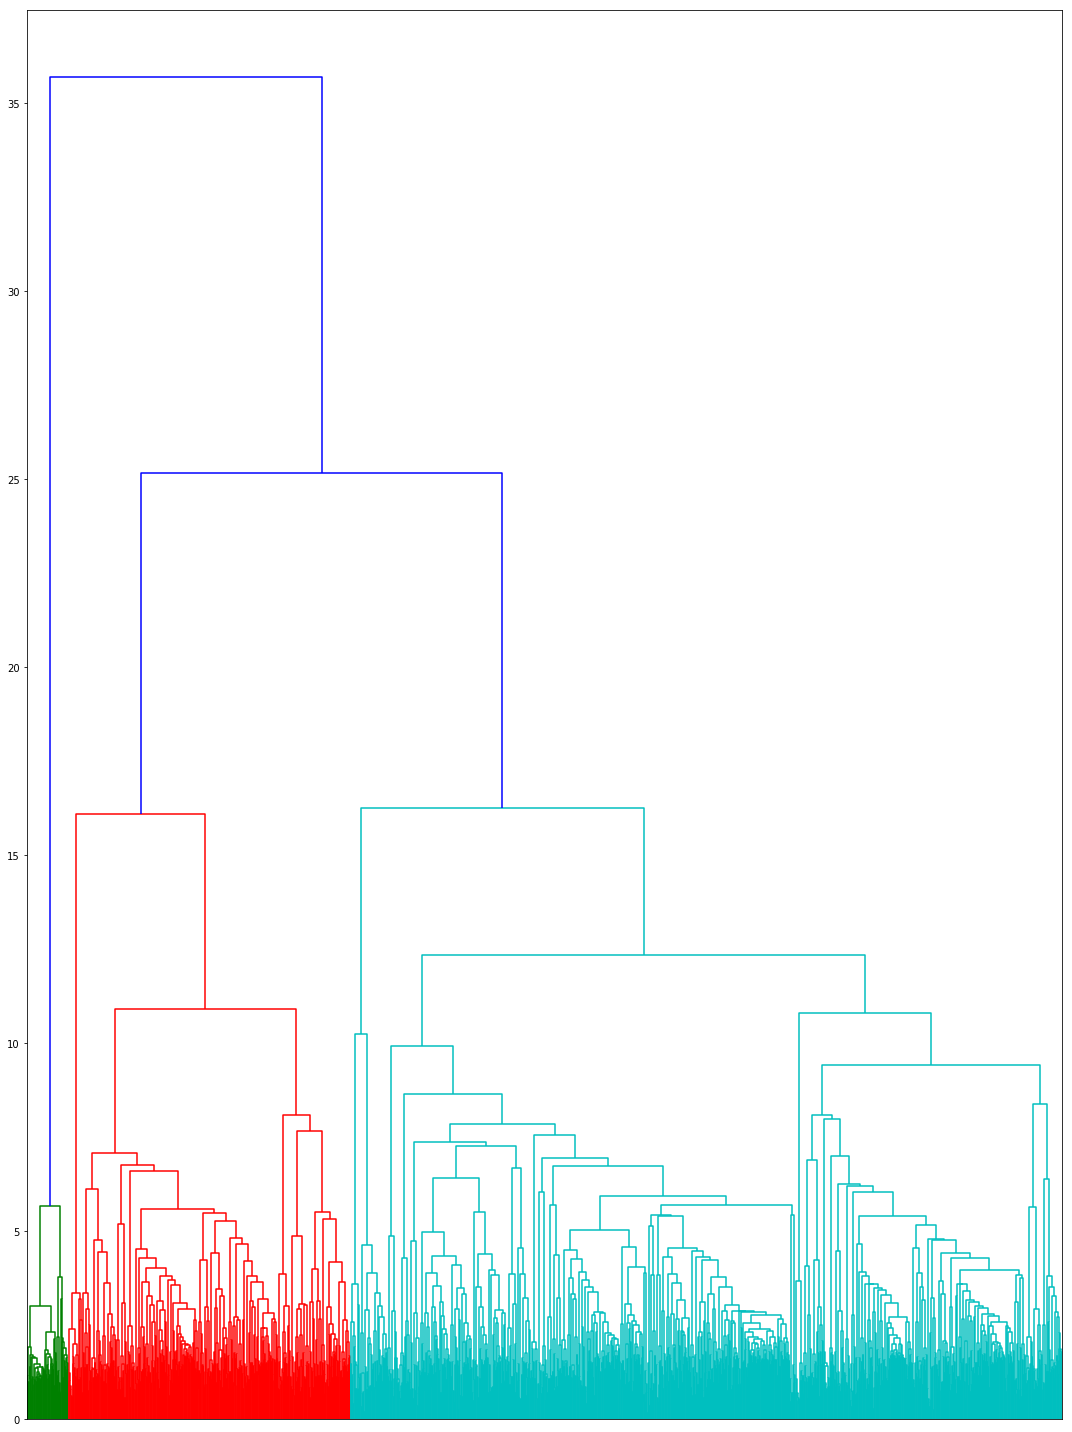

In [100]:
# Exercise 6.1 Hierarchical clustering

from scipy.cluster.hierarchy import linkage,dendrogram
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.metrics.pairwise import cosine_similarity

# distance between any pair of documents
dist = 1 - cosine_similarity(dtm)

# create a linkage matrix using ward's method
# the linkage matrix contains the dendragram data
# in ward methods, the distance between two clusters
# is measured as the sum of distance 
# from each sample to the cluster center 

#linkage_matrix = average(dist)
# method: how to merge cluster
linkage_matrix = linkage(dist, method='ward')

# plot the dendrogram
fig, ax = plt.subplots(figsize=(15, 20)) # set size
ax = dendrogram(linkage_matrix, orientation="top");

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout

In [101]:
# Exercise 6.2 Get Clusters

from scipy.cluster.hierarchy import cut_tree

clusters = cut_tree(linkage_matrix,height=12)
clusters=clusters.flatten().tolist()

# get documents from each clusters and examine the clusters

df=pd.DataFrame(list(zip(target, clusters)), \
                columns=['actual_class','cluster'])
df.head()
pd.crosstab( index=df.cluster, columns=df.actual_class)

,actual_class,cluster
0,comp.graphics,0
1,comp.graphics,0
2,soc.religion.christian,1
3,soc.religion.christian,1
4,soc.religion.christian,2


actual_class,comp.graphics,sci.med,soc.religion.christian
cluster,,,
0,569,104,27
1,0,1,459
2,15,347,96
3,0,71,0
4,0,64,0
5,0,7,17


In [71]:
max(clusters)

8

In [102]:
# # Exercise 6.3 Map clusters to true class

cluster_dict={0:'comp.graphics', 2:"sci.med",\
              1:'soc.religion.christian', 3:"sci.med",\
              4:"sci.med",5:'soc.religion.christian'}

# Assign true class to cluster
# Some small clusters cannot be mapped to any true class
predicted_target=[cluster_dict[i] for i in clusters ]

                     
print(metrics.classification_report\
      (target, predicted_target))

                        precision    recall  f1-score   support

         comp.graphics       0.81      0.97      0.89       584
               sci.med       0.81      0.81      0.81       594
soc.religion.christian       0.98      0.79      0.88       599

           avg / total       0.87      0.86      0.86      1777



In [103]:
# Exercise 6.2 Get Clusters

from scipy.cluster.hierarchy import cut_tree

clusters = cut_tree(linkage_matrix,height=20)
clusters=clusters.flatten().tolist()

# get documents from each clusters and examine the clusters

df=pd.DataFrame(list(zip(target, clusters)), \
                columns=['actual_class','cluster'])
df.head()
pd.crosstab( index=df.cluster, columns=df.actual_class)

,actual_class,cluster
0,comp.graphics,0
1,comp.graphics,0
2,soc.religion.christian,1
3,soc.religion.christian,1
4,soc.religion.christian,0


actual_class,comp.graphics,sci.med,soc.religion.christian
cluster,,,
0,584,515,123
1,0,8,476
2,0,71,0


In [104]:
# # Exercise 6.3 Map clusters to true class

cluster_dict={0:'comp.graphics', 2:"sci.med",\
              1:'soc.religion.christian'}

# Assign true class to cluster
# Some small clusters cannot be mapped to any true class
predicted_target=[cluster_dict[i] for i in clusters ]

                     
print(metrics.classification_report\
      (target, predicted_target))

                        precision    recall  f1-score   support

         comp.graphics       0.48      1.00      0.65       584
               sci.med       1.00      0.12      0.21       594
soc.religion.christian       0.98      0.79      0.88       599

           avg / total       0.82      0.64      0.58      1777

